## Wearable Tech: Week 3 Assignment

### Step 1

In [1]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates

from datetime import datetime
import plotly.graph_objects as go

df = pd.read_csv("D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\WearableTechnologiesAndSportsAnalytics\\data\\WBBtotal.csv", index_col =["Timestamp"], parse_dates=["Timestamp"])

### Step 2

In [2]:
columns_to_keep = ['Seconds','Heart Rate', 'Player Load', 'AthleteID']

df_wbb = df[columns_to_keep]
df_wbb

,Seconds,Heart Rate,Player Load,AthleteID
Timestamp,,,,
2019-01-08 17:39:42,0.0,83,0.0,Athlete 1
2019-01-08 17:39:42,0.1,83,0.0,Athlete 1
2019-01-08 17:39:42,0.2,83,0.0,Athlete 1
2019-01-08 17:39:42,0.3,83,0.0,Athlete 1
2019-01-08 17:39:42,0.4,83,0.0,Athlete 1
...,...,...,...,...
2019-03-08 16:47:03,11484.4,101,1001.5,Athlete 5
2019-03-08 16:47:03,11484.5,101,1001.5,Athlete 5
2019-03-08 16:47:03,11484.6,101,1001.5,Athlete 5


### Step 3

In [4]:
df_3_9 = df_wbb.loc['2019-03-09']
df_3_9

,Seconds,Heart Rate,Player Load,AthleteID
Timestamp,,,,
2019-03-09 15:57:49,0.0,0,0.0,Athlete 10
2019-03-09 15:57:49,0.1,0,0.0,Athlete 10
2019-03-09 15:57:49,0.2,0,0.0,Athlete 10
2019-03-09 15:57:49,0.3,0,0.0,Athlete 10
2019-03-09 15:57:49,0.4,0,0.0,Athlete 10
...,...,...,...,...
2019-03-09 19:08:14,11348.4,108,470.6,Athlete 8
2019-03-09 19:08:14,11348.5,106,470.6,Athlete 8
2019-03-09 19:08:14,11348.6,106,470.6,Athlete 8


### Step 4

In [5]:
(df_3_9 == 0).sum(axis=0)

Seconds           13
Heart Rate     69452
Player Load      391
AthleteID          0
dtype: int64

### Step 5

In [7]:
df_3_9.loc[df_3_9['Heart Rate'] ==0, 'Heart Rate'] = np.nan

df_3_9.groupby('AthleteID').agg([min,np.average,max,len])

DataCount = df_3_9.groupby('AthleteID')['Heart Rate','Player Load'].count()

DataCount['Missing HR values']= (DataCount['Player Load']-DataCount['Heart Rate'])
DataCount['% HR missing'] = DataCount['Missing HR values']/DataCount['Player Load']*100

print(DataCount.sort_values(by='% HR missing', ascending = False))

C:\Users\mgy0003\AppData\Local\Temp\ipykernel_10972\914947691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_9.loc[df_3_9['Heart Rate'] ==0, 'Heart Rate'] = np.nan


            Heart Rate  Player Load  Missing HR values  % HR missing
AthleteID                                                           
Athlete 10      104229       114261              10032      8.779899
Athlete 11      105176       113469               8293      7.308604
Athlete 13      105498       113346               7848      6.923932
Athlete 3       106787       113519               6732      5.930285
Athlete 9       108116       113819               5703      5.010587
Athlete 5       108154       113629               5475      4.818312
Athlete 2       109071       113829               4758      4.179954
Athlete 6       108862       113579               4717      4.153056
Athlete 12      109057       113689               4632      4.074273
Athlete 8       109899       113489               3590      3.163302
Athlete 1       110378       113379               3001      2.646875
Athlete 4       110829       113749               2920      2.567056
Athlete 7       111604       11335

C:\Users\mgy0003\AppData\Local\Temp\ipykernel_10972\914947691.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  DataCount = df_3_9.groupby('AthleteID')['Heart Rate','Player Load'].count()


### Step 6


AthleteID
Athlete 10    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 7     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

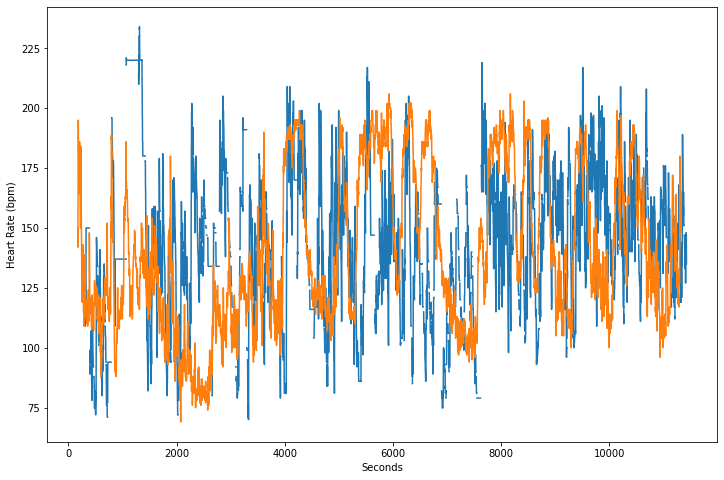

In [8]:
(df_3_9.query("AthleteID == 'Athlete 10' or AthleteID == 'Athlete 7'")
    .groupby("AthleteID")
    .plot(x="Seconds",y="Heart Rate", ax=plt.gca(), ylabel="Heart Rate (bpm)", figsize=(12,8), legend=False))

### Step 7

<AxesSubplot:xlabel='Seconds'>

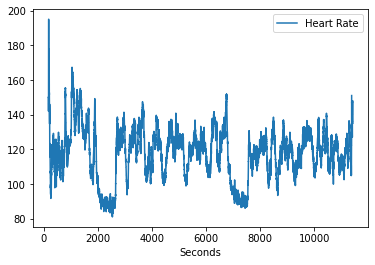

In [9]:
Team_Mean_HR2 = df_3_9.groupby(['Seconds'])[['Heart Rate']].mean()
Team_Mean_HR2.plot(y='Heart Rate')

### Step 8


In [13]:
Rank_Mean_HR = df_3_9.groupby(['AthleteID'])[['Heart Rate']].mean()

t= 12000/60  # 12000 seconds divided by 60 to provide minutes (200 minutes in this double-overtime game with warm-up time included)

HRmax=200
HRrest=60

FHRR = (Rank_Mean_HR['Heart Rate']-HRrest)/ (HRmax-HRrest)

kval = (np.exp(1.67 * FHRR))
print(FHRR)

TRIMP = t * FHRR * kval

print(TRIMP)

AthleteID
Athlete 1     0.594641
Athlete 10    0.598140
Athlete 11    0.348043
Athlete 12    0.215147
Athlete 13    0.353543
Athlete 2     0.430392
Athlete 3     0.241917
Athlete 4     0.173936
Athlete 5     0.520268
Athlete 6     0.341227
Athlete 7     0.576337
Athlete 8     0.379566
Athlete 9     0.595872
Name: Heart Rate, dtype: float64
AthleteID
Athlete 1     321.041173
Athlete 10    324.822671
Athlete 11    124.477146
Athlete 12     61.631714
Athlete 13    127.610514
Athlete 2     176.621997
Athlete 3      72.469069
Athlete 4      46.512651
Athlete 5     248.080302
Athlete 6     120.657609
Athlete 7     301.791750
Athlete 8     143.089162
Athlete 9     322.367890
Name: Heart Rate, dtype: float64


### Step 9

In [12]:
InternalLoads=pd.concat([TRIMP, Rank_Mean_HR], axis=1)
InternalLoads.columns=['TRIMP Values','MEAN HR Values']
print(InternalLoads)

            TRIMP Values  MEAN HR Values
AthleteID                               
Athlete 1     321.041173      143.249696
Athlete 10    324.822671      143.739545
Athlete 11    124.477146      108.726088
Athlete 12     61.631714       90.120524
Athlete 13    127.610514      109.495981
Athlete 2     176.621997      120.254834
Athlete 3      72.469069       93.868420
Athlete 4      46.512651       84.351072
Athlete 5     248.080302      132.837472
Athlete 6     120.657609      107.771711
Athlete 7     301.791750      140.687171
Athlete 8     143.089162      113.139310
Athlete 9     322.367890      143.422047
